In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Preprocessing of original dataset

In [72]:
df = pd.read_csv('MBTI_combined_features.csv')

In [75]:
df

,Unnamed: 0,Unnamed: 0_x,Tag,Cleaned_Text,Cleaned_Text_No_Emoticon,Text_stemmed,Bigram,Trigram,Length,Emoticons_count,...,conjunction,pronoun,preposition,nominalization,pronoun.1,interrogative,article,subordination,conjunction.1,preposition.1
0,0,0,ENFJ,memeincorrect quote sure trying keep peace family,memeincorrect quote sure trying keep peace family,memeincorrect quot sure tri peac famili,memeincorrect quote sure trying keep_peace family,memeincorrect quote sure trying keep_peace family,49,1,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,ENTP,memefour distinct flavors nt,memefour distinct flavors nt,memefour distinct flavor,memefour distinct flavors nt,memefour distinct flavors nt,28,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,ENTP,memethis definitely intp looks like,memethis definitely intp looks like,memethi definit intp look like,memethis definitely intp looks_like,memethis definitely intp looks_like,35,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,ISFJ,theory questionwhat type admire,theory questionwhat type admire,theori questionwhat type admir,theory_questionwhat type admire,theory_questionwhat type admire,31,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,ISTJ,memeistj x enfp real,memeistj x enfp real,memeistj enfp real,memeistj x enfp real,memeistj x enfp real,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127730,127730,127578,ISFP,always think cats fi doms reason websites beco...,always think cats fi doms reason websites beco...,think cat dom reason websit nazi perci nerd le...,always think cats fi_doms reason websites beco...,always think cats fi_doms reason websites beco...,2833,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127731,127731,127579,ENFP,soif thread already exists someplace else heck...,soif thread already exists someplace else heck...,soif thread exist someplac heck delet hereooop...,soif thread already_exists someplace else heck...,soif thread already_exists someplace_else heck...,4470,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127732,127732,127580,INTP,many questions things would take purple pill p...,many questions things would take purple pill p...,question thing purpl pill pick win lotteri num...,many questions things would take purple pill p...,many questions things would take purple pill p...,3409,2,...,32.0,155.0,96.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
127733,127733,127581,INFP,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,conflict right come want children honest mater...,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,5396,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df = df[df['Tag']!="MBTI"]

In [77]:
df = df.fillna(0)

In [79]:
df['count'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))

In [80]:
df_new1 = df.loc[(df['count']>100)]

In [81]:
df_new2 = df.loc[(df['Kaggle']==1)]

In [83]:
df_new_final = df_new1.merge(df_new2, 'outer')

In [84]:
df_new_final.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Tag', 'Cleaned_Text',
       'Cleaned_Text_No_Emoticon', 'Text_stemmed', 'Bigram', 'Trigram',
       'Length', 'Emoticons_count', 'Emoticons Avg', 'Unique_Words', 'TTR',
       'Dominant Emotion', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'negative', 'positive', 'sadness', 'surprise', 'trust', 'emotion',
       'Reddit', 'Twitter', 'Typology', 'Kaggle', 'Afinn Score', 'Polarity',
       'Subjectivity', 'Unnamed: 0_y', 'num_noun', 'num_adj', 'num_prep',
       'num_det', 'num_pron', 'num_verb', 'num_adverb', 'num_interject',
       'lowercase', 'uppercase', 'uppercase_num', 'proper cap',
       'contractions_num', 'emotionalpunctuations_num', 'readable_num',
       'hedge_perc', 'firstperson_perc', 'thirdperson_perc', 'Kincaid', 'ARI',
       'Coleman-Liau', 'FleschReadingEase', 'GunningFogIndex', 'LIX',
       'SMOGIndex', 'RIX', 'DaleChallIndex', 'characters_per_word',
       'syll_per_word', 'words_per_sentence', 'sentences_per_pa

In [86]:
Kaggle1 = df_new_final[df_new_final['Kaggle']==1]
reddit1 = df_new_final[df_new_final['Reddit']==1]
Twitter1 = df_new_final[df_new_final['Twitter']==1]
Typology1 = df_new_final[df_new_final['Typology']==1]

print(len(Kaggle1))
print(len(reddit1))
print(len(Twitter1))
print(len(Typology1))

8675
40
0
4111


In [91]:
df_new_final['E_I'] = df_new_final['Tag'].apply(lambda x: "E" if x in ['ENFJ', 'ENTP', 'ESTJ', 'ENFP', 'ESTP', 'ENTJ', 'ESFP', 'ESFJ'] else "I")

df_new_final['N_S'] = df_new_final['Tag'].apply(lambda x: "N" if x in ['ENFJ', 'ENTP', 'ENFP', 'ENTJ', 'INTP', 'INFP', 'INFJ', 'INTJ'] else "S")

df_new_final['F_T'] = df_new_final['Tag'].apply(lambda x: "F" if x in ['ENFJ', 'ENFP', 'ESFP', 'ESFJ', 'ISFJ', 'INFP', 'INFJ', 'ISFP'] else "T")

df_new_final['J_P'] = df_new_final['Tag'].apply(lambda x: "J" if x in ['ENFJ', 'ESTJ', 'ENTJ', 'ESFJ', 'ISFJ', 'ISTJ', 'INFJ', 'INTJ'] else "P")

In [92]:
df_new_final

,Unnamed: 0,Unnamed: 0_x,Tag,Cleaned_Text,Cleaned_Text_No_Emoticon,Text_stemmed,Bigram,Trigram,Length,Emoticons_count,...,interrogative,article,subordination,conjunction.1,preposition.1,count,E_I,N_S,F_T,J_P
0,4510,4502,ENFP,disagree think theory given validity rather be...,disagree think theory given validity rather be...,disagre think theori given valid believ struct...,disagree think theory given validity rather be...,disagree think theory given validity rather be...,1682,0,...,0.0,1.0,0.0,0.0,0.0,228,E,N,F,P
1,5695,5682,INTP,selfish generally perform task better person a...,selfish generally perform task better person a...,selfish general perform task better person see...,selfish generally perform task better person a...,selfish generally perform_task better person a...,1265,0,...,0.0,0.0,0.0,0.0,0.0,177,I,N,T,P
2,7567,7552,INFP,personality system technically separate mbti t...,personality system technically separate mbti t...,person technic separ mbti type usual hand enne...,personality system technically separate mbti_t...,personality system technically separate mbti_t...,738,0,...,0.0,1.0,0.0,0.0,0.0,129,I,N,F,P
3,10138,10121,INTP,like functions general theyre basically ways p...,like functions general theyre basically ways p...,like function general theyr basic way process ...,like functions general theyre basically ways p...,like functions general theyre basically ways_p...,1550,0,...,1.0,0.0,0.0,0.0,0.0,206,I,N,T,P
4,11256,11239,ENTP,even referring nihilism yeah point dying livin...,even referring nihilism yeah point dying livin...,refer nihil yeah point die live pretti simpl q...,even referring nihilism yeah point dying livin...,even referring nihilism yeah point dying livin...,767,0,...,0.0,0.0,0.0,0.0,0.0,110,E,N,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,125949,125797,ISTP,kinda amusing deal trust relate usually someon...,kinda amusing deal trust relate usually someon...,kinda amus deal trust relat usual snap absolut...,kinda amusing deal trust relate usually someon...,kinda_amusing deal trust relate usually someon...,599,0,...,0.0,0.0,0.0,0.0,0.0,88,I,S,T,P
12822,126590,126438,ESFP,social 9 description fit better probably descr...,social description fit better probably descrip...,social descript better probabl descript read t...,social description fit better probably descrip...,social description_fit better probably descrip...,617,23,...,0.0,0.0,0.0,0.0,0.0,89,E,S,F,P
12823,126860,126708,ISFP,believe blood type influence someone personali...,believe blood type influence someone personali...,believ blood type influenc japanes post blood ...,believe blood type influence someone personali...,believe blood_type influence someone personali...,260,0,...,0.0,0.0,0.0,0.0,0.0,34,I,S,F,P
12824,126941,126789,INFJ,benevolent creator linkpractical 26 conceptual...,benevolent creator linkpractical conceptual ad...,benevol creator linkpract conceptu adventur so...,benevolent creator linkpractical conceptual ad...,benevolent_creator linkpractical conceptual ad...,645,2,...,0.0,0.0,0.0,0.0,0.0,95,I,N,F,J


In [95]:
df_new_final.drop(columns = ['Unnamed: 0', 'Unnamed: 0_x','Cleaned_Text_No_Emoticon', 'Text_stemmed', 'Bigram', 'Trigram','Dominant Emotion','emotion'], inplace=True)

In [96]:
df_new_final

,Tag,Cleaned_Text,Length,Emoticons_count,Emoticons Avg,Unique_Words,TTR,anger,anticipation,disgust,...,interrogative,article,subordination,conjunction.1,preposition.1,count,E_I,N_S,F_T,J_P
0,ENFP,disagree think theory given validity rather be...,1682,0,0.000000,25,0.014863,0.002378,0.003567,0.000595,...,0.0,1.0,0.0,0.0,0.0,228,E,N,F,P
1,INTP,selfish generally perform task better person a...,1265,0,0.000000,26,0.020553,0.010277,0.006324,0.010277,...,0.0,0.0,0.0,0.0,0.0,177,I,N,T,P
2,INFP,personality system technically separate mbti t...,738,0,0.000000,25,0.033875,0.001355,0.000000,0.004065,...,0.0,1.0,0.0,0.0,0.0,129,I,N,F,P
3,INTP,like functions general theyre basically ways p...,1550,0,0.000000,25,0.016129,0.002581,0.006452,0.002581,...,1.0,0.0,0.0,0.0,0.0,206,I,N,T,P
4,ENTP,even referring nihilism yeah point dying livin...,767,0,0.000000,25,0.032595,0.011734,0.007823,0.006519,...,0.0,0.0,0.0,0.0,0.0,110,E,N,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,ISTP,kinda amusing deal trust relate usually someon...,599,0,0.000000,24,0.040067,0.000000,0.005008,0.001669,...,0.0,0.0,0.0,0.0,0.0,88,I,S,T,P
12822,ESFP,social 9 description fit better probably descr...,617,23,0.037277,25,0.040519,0.000000,0.003241,0.003241,...,0.0,0.0,0.0,0.0,0.0,89,E,S,F,P
12823,ISFP,believe blood type influence someone personali...,260,0,0.000000,26,0.100000,0.000000,0.003846,0.000000,...,0.0,0.0,0.0,0.0,0.0,34,I,S,F,P
12824,INFJ,benevolent creator linkpractical 26 conceptual...,645,2,0.003101,25,0.038760,0.001550,0.007752,0.001550,...,0.0,0.0,0.0,0.0,0.0,95,I,N,F,J


In [98]:
df_new_final.to_csv('combined_with_split_tags.csv')

In [3]:
df = pd.read_csv('combined_with_split_tags2.csv')

In [4]:
df

,Tag,Cleaned_Text,Length,Emoticons_count,Emoticons Avg,Unique_Words,TTR,anger,anticipation,disgust,...,interrogative,article,subordination,conjunction.1,preposition.1,count,E_I,N_S,F_T,J_P
0,ENFP,disagree think theory given validity rather be...,1682,0,0.000000,25,0.014863,0.002378,0.003567,0.000595,...,0,1,0,0,0,228,E,N,F,P
1,INTP,selfish generally perform task better person a...,1265,0,0.000000,26,0.020553,0.010277,0.006324,0.010277,...,0,0,0,0,0,177,I,N,T,P
2,INFP,personality system technically separate types...,738,0,0.000000,25,0.033875,0.001355,0.000000,0.004065,...,0,1,0,0,0,129,I,N,F,P
3,INTP,like functions general theyre basically ways p...,1550,0,0.000000,25,0.016129,0.002581,0.006452,0.002581,...,1,0,0,0,0,206,I,N,T,P
4,ENTP,even referring nihilism yeah point dying livin...,767,0,0.000000,25,0.032595,0.011734,0.007823,0.006519,...,0,0,0,0,0,110,E,N,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,ISTP,kinda amusing deal trust relate usually someon...,599,0,0.000000,24,0.040067,0.000000,0.005008,0.001669,...,0,0,0,0,0,88,I,S,T,P
12822,ESFP,social 9 description fit better probably descr...,617,23,0.037277,25,0.040519,0.000000,0.003241,0.003241,...,0,0,0,0,0,89,E,S,F,P
12823,ISFP,believe blood type influence someone personali...,260,0,0.000000,26,0.100000,0.000000,0.003846,0.000000,...,0,0,0,0,0,34,I,S,F,P
12824,INFJ,benevolent creator linkpractical 26 conceptual...,645,2,0.003101,25,0.038760,0.001550,0.007752,0.001550,...,0,0,0,0,0,95,I,N,F,J


In [6]:
df.columns

Index(['Tag', 'Cleaned_Text', 'Length', 'Emoticons_count', 'Emoticons Avg',
       'Unique_Words', 'TTR', 'anger', 'anticipation', 'disgust', 'fear',
       'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust',
       'Afinn Score', 'Polarity', 'Subjectivity', 'num_noun', 'num_adj',
       'num_prep', 'num_det', 'num_pron', 'num_verb', 'num_adverb',
       'num_interject', 'lowercase', 'uppercase', 'uppercase_num',
       'proper cap', 'contractions_num', 'emotionalpunctuations_num',
       'readable_num', 'hedge_perc', 'firstperson_perc', 'thirdperson_perc',
       'Kincaid', 'ARI', 'Coleman-Liau', 'FleschReadingEase',
       'GunningFogIndex', 'LIX', 'SMOGIndex', 'RIX', 'DaleChallIndex',
       'characters_per_word', 'syll_per_word', 'words_per_sentence',
       'sentences_per_paragraph', 'type_token_ratio', 'characters',
       'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs',
       'long_words', 'complex_words', 'complex_words_dc', 'tobeverb',
       'auxverb'

# Hyperparameter tuning & Feature importance for split tags E-I and N-S

# E_I

In [7]:
X_df = df.drop(columns = ['count','Tag','E_I', 'N_S', 'F_T', 'J_P'])
y_targets_df = df[['E_I']]

X_train_df1, X_test_df1, y_train_targets_df1, y_test_targets_df1 = train_test_split(X_df, y_targets_df,random_state=1, test_size=0.2)

X_train_df1.reset_index(inplace=True)
X_test_df1.reset_index(inplace=True)
y_train_targets_df1.reset_index(inplace=True)
y_test_targets_df1.reset_index(inplace=True)

# Word Representation
transformer = Pipeline([('vect', CountVectorizer(max_features = 5000))])
X_train_dtm_df = transformer.fit_transform(X_train_df1['Cleaned_Text'])
X_test_dtm_df = transformer.transform(X_test_df1['Cleaned_Text'])

# Scaling features
sc = StandardScaler()
X_train_df = sc.fit_transform(X_train_df1.drop(columns = ['Cleaned_Text', 'index']))
X_test_df = sc.transform(X_test_df1.drop(columns = ['Cleaned_Text', 'index']))

# Stacking text dtm with other features
X_train_new = sparse.hstack((X_train_dtm_df, X_train_df))
X_test_new = sparse.hstack((X_test_dtm_df, X_test_df))

In [8]:
X_train_df1.drop(columns = ['Cleaned_Text', 'index'])

,Length,Emoticons_count,Emoticons Avg,Unique_Words,TTR,anger,anticipation,disgust,fear,joy,...,conjunction,pronoun,preposition,nominalization,pronoun.1,interrogative,article,subordination,conjunction.1,preposition.1
0,4554,7,0.001537,27,0.005929,0.002415,0.005929,0.001098,0.001976,0.007905,...,0,0,0,0,0,0,0,0,0,0
1,4473,9,0.002012,27,0.006036,0.003353,0.009837,0.003130,0.002906,0.010731,...,0,0,0,0,0,0,0,0,0,0
2,1138,0,0.000000,25,0.021968,0.001757,0.011424,0.002636,0.001757,0.003515,...,10,41,33,2,2,1,0,0,0,0
3,3657,29,0.007930,26,0.007110,0.004102,0.009571,0.002188,0.004649,0.008750,...,0,0,0,0,0,0,0,0,0,0
4,4802,7,0.001458,27,0.005623,0.002499,0.004373,0.002291,0.002707,0.004790,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,5147,14,0.002720,27,0.005246,0.004080,0.007577,0.003109,0.004469,0.006606,...,0,0,0,0,0,0,0,0,0,0
10256,766,0,0.000000,26,0.033943,0.001305,0.007833,0.001305,0.001305,0.005222,...,8,36,27,3,7,1,0,1,1,1
10257,2889,2,0.000692,27,0.009346,0.002077,0.004846,0.001385,0.002769,0.003461,...,0,0,0,0,0,0,0,0,0,0
10258,3178,4,0.001259,27,0.008496,0.004091,0.007237,0.003461,0.004091,0.005349,...,26,91,80,3,0,0,0,0,0,0


In [9]:
X_train_new.shape

(10260, 5071)

In [10]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 300],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [11]:
# Create a based model
rf_EI = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_EI, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [12]:
grid_search.fit(X_train_new, y_train_targets_df1['E_I'])

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 34.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [200, 300]},
             verbose=2)

In [13]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'max_depth': 100,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [14]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=100,
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200)

In [15]:
# Fitting new random forest model with tuned hyperparameters
rf_opt_EI = RandomForestClassifier(class_weight='balanced_subsample', max_depth=100,
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200)

rf_opt_EI.fit(X_train_new, y_train_targets_df1['E_I'])

RandomForestClassifier(class_weight='balanced_subsample', max_depth=100,
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200)

In [16]:
pickle.dump(rf_opt_EI, open("RF_opt_EI.sav", "wb"))

In [7]:
#RF_opt_EI = pickle.load(open('RF_opt_EI.sav', 'rb'))

In [17]:
pred_EI = rf_opt_EI.predict(X_test_new)

accuracy_score(pred_EI, y_test_targets_df1['E_I'])

0.7197973499610288

In [18]:
importance = rf_opt_EI.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00028
Feature: 2, Score: 0.00032
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00006
Feature: 5, Score: 0.00021
Feature: 6, Score: 0.00013
Feature: 7, Score: 0.00011
Feature: 8, Score: 0.00017
Feature: 9, Score: 0.00015
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.00016
Feature: 12, Score: 0.00012
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00008
Feature: 15, Score: 0.00002
Feature: 16, Score: 0.00031
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00013
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00011
Feature: 23, Score: 0.00010
Feature: 24, Score: 0.00015
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00004
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00004
Feature: 30, Score: 0.00007
Feature: 31, Score: 0.00052
Feature: 32, Score: 0.00019
Feature: 33, Score: 0.00002
Feature: 34, Score: 0.00001
Feature: 35, Score: 0.00004
Fe

Feature: 1355, Score: 0.00006
Feature: 1356, Score: 0.00023
Feature: 1357, Score: 0.00009
Feature: 1358, Score: 0.00003
Feature: 1359, Score: 0.00007
Feature: 1360, Score: 0.00020
Feature: 1361, Score: 0.00017
Feature: 1362, Score: 0.00007
Feature: 1363, Score: 0.00001
Feature: 1364, Score: 0.00003
Feature: 1365, Score: 0.00012
Feature: 1366, Score: 0.00014
Feature: 1367, Score: 0.00011
Feature: 1368, Score: 0.00024
Feature: 1369, Score: 0.00002
Feature: 1370, Score: 0.00021
Feature: 1371, Score: 0.00047
Feature: 1372, Score: 0.00001
Feature: 1373, Score: 0.00019
Feature: 1374, Score: 0.00000
Feature: 1375, Score: 0.00002
Feature: 1376, Score: 0.00015
Feature: 1377, Score: 0.00001
Feature: 1378, Score: 0.00003
Feature: 1379, Score: 0.00003
Feature: 1380, Score: 0.00006
Feature: 1381, Score: 0.00007
Feature: 1382, Score: 0.00005
Feature: 1383, Score: 0.00003
Feature: 1384, Score: 0.00003
Feature: 1385, Score: 0.00018
Feature: 1386, Score: 0.00029
Feature: 1387, Score: 0.00003
Feature: 1

Feature: 2855, Score: 0.00013
Feature: 2856, Score: 0.00002
Feature: 2857, Score: 0.00014
Feature: 2858, Score: 0.00002
Feature: 2859, Score: 0.00003
Feature: 2860, Score: 0.00015
Feature: 2861, Score: 0.00007
Feature: 2862, Score: 0.00006
Feature: 2863, Score: 0.00000
Feature: 2864, Score: 0.00003
Feature: 2865, Score: 0.00007
Feature: 2866, Score: 0.00008
Feature: 2867, Score: 0.00001
Feature: 2868, Score: 0.00005
Feature: 2869, Score: 0.00021
Feature: 2870, Score: 0.00052
Feature: 2871, Score: 0.00040
Feature: 2872, Score: 0.00016
Feature: 2873, Score: 0.00000
Feature: 2874, Score: 0.00063
Feature: 2875, Score: 0.00004
Feature: 2876, Score: 0.00001
Feature: 2877, Score: 0.00026
Feature: 2878, Score: 0.00041
Feature: 2879, Score: 0.00023
Feature: 2880, Score: 0.00001
Feature: 2881, Score: 0.00003
Feature: 2882, Score: 0.00022
Feature: 2883, Score: 0.00012
Feature: 2884, Score: 0.00002
Feature: 2885, Score: 0.00001
Feature: 2886, Score: 0.00007
Feature: 2887, Score: 0.00004
Feature: 2

Feature: 4354, Score: 0.00004
Feature: 4355, Score: 0.00002
Feature: 4356, Score: 0.00045
Feature: 4357, Score: 0.00011
Feature: 4358, Score: 0.00006
Feature: 4359, Score: 0.00000
Feature: 4360, Score: 0.00001
Feature: 4361, Score: 0.00135
Feature: 4362, Score: 0.00038
Feature: 4363, Score: 0.00039
Feature: 4364, Score: 0.00043
Feature: 4365, Score: 0.00001
Feature: 4366, Score: 0.00006
Feature: 4367, Score: 0.00002
Feature: 4368, Score: 0.00089
Feature: 4369, Score: 0.00003
Feature: 4370, Score: 0.00030
Feature: 4371, Score: 0.00104
Feature: 4372, Score: 0.00018
Feature: 4373, Score: 0.00002
Feature: 4374, Score: 0.00001
Feature: 4375, Score: 0.00000
Feature: 4376, Score: 0.00001
Feature: 4377, Score: 0.00003
Feature: 4378, Score: 0.00010
Feature: 4379, Score: 0.00003
Feature: 4380, Score: 0.00015
Feature: 4381, Score: 0.00004
Feature: 4382, Score: 0.00000
Feature: 4383, Score: 0.00002
Feature: 4384, Score: 0.00016
Feature: 4385, Score: 0.00001
Feature: 4386, Score: 0.00010
Feature: 4

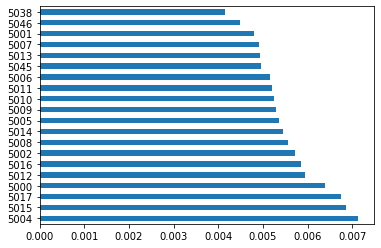

In [31]:
feat_importances = pd.Series(rf_opt_EI.feature_importances_)
feat_importances.nlargest(20).plot(kind='barh')

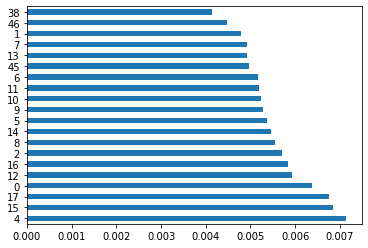

In [32]:
feat_importances = pd.Series(importance[-71:])
feat_importances.nlargest(20).plot(kind='barh')

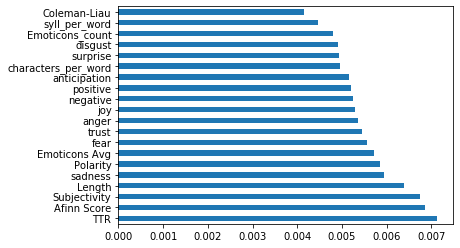

In [20]:
feat_importances2 = pd.Series(importance[-71:], index=X_train_df1.drop(columns = ['Cleaned_Text', 'index']).columns)
feat_importances2.nlargest(20).plot(kind='barh')

# N_S

In [21]:
X_df = df.drop(columns = ['count','Tag','E_I', 'N_S', 'F_T', 'J_P'])
y_targets_df = df[['N_S']]

X_train_df1, X_test_df1, y_train_targets_df1, y_test_targets_df1 = train_test_split(X_df, y_targets_df,random_state=1)

X_train_df1.reset_index(inplace=True)
X_test_df1.reset_index(inplace=True)
y_train_targets_df1.reset_index(inplace=True)
y_test_targets_df1.reset_index(inplace=True)

# Word Representation
transformer = Pipeline([('vect', CountVectorizer(max_features = 5000))])
X_train_dtm_df = transformer.fit_transform(X_train_df1['Cleaned_Text'])
X_test_dtm_df = transformer.transform(X_test_df1['Cleaned_Text'])

# Scaling features
sc = StandardScaler()
X_train_df = sc.fit_transform(X_train_df1.drop(columns = ['Cleaned_Text', 'index']))
X_test_df = sc.transform(X_test_df1.drop(columns = ['Cleaned_Text', 'index']))

# Stacking text dtm with other features
X_train_new = sparse.hstack((X_train_dtm_df, X_train_df))
X_test_new = sparse.hstack((X_test_dtm_df, X_test_df))

In [22]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 300],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [23]:
# Create a based model
rf_NS = RandomForestClassifier()
# Instantiate the grid search model
grid_search_NS = GridSearchCV(estimator = rf_NS, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [24]:
grid_search_NS.fit(X_train_new, y_train_targets_df1['N_S'])

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 26.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [200, 300]},
             verbose=2)

In [25]:
grid_search_NS.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [26]:
grid_search_NS.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=80,
                       min_samples_leaf=3, min_samples_split=12,
                       n_estimators=300)

In [27]:
# Fitting new random forest model with tuned hyperparameters
rf_opt_NS = RandomForestClassifier(class_weight='balanced', max_depth=80,
                       min_samples_leaf=3, min_samples_split=12,
                       n_estimators=300)

rf_opt_NS.fit(X_train_new, y_train_targets_df1['N_S'])

RandomForestClassifier(class_weight='balanced', max_depth=80,
                       min_samples_leaf=3, min_samples_split=12,
                       n_estimators=300)

In [28]:
pickle.dump(rf_opt_NS, open("RF_opt_NS.sav", "wb"))

In [ ]:
#RF_opt_NS = pickle.load(open('RF_opt_NS.sav', 'rb'))

In [29]:
pred_NS = rf_opt_NS.predict(X_test_new)

accuracy_score(pred_NS, y_test_targets_df1['N_S'])

0.8260056127221702

In [33]:
importance = rf_opt_NS.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00029
Feature: 3, Score: 0.00029
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00014
Feature: 7, Score: 0.00014
Feature: 8, Score: 0.00012
Feature: 9, Score: 0.00024
Feature: 10, Score: 0.00013
Feature: 11, Score: 0.00009
Feature: 12, Score: 0.00011
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00004
Feature: 16, Score: 0.00003
Feature: 17, Score: 0.00018
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00006
Feature: 23, Score: 0.00005
Feature: 24, Score: 0.00011
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.00003
Feature: 27, Score: 0.00005
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00007
Feature: 31, Score: 0.00003
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00019
Feature: 34, Score: 0.00004
Feature: 35, Score: 0.00001
Fe

Feature: 1651, Score: 0.00000
Feature: 1652, Score: 0.00073
Feature: 1653, Score: 0.00010
Feature: 1654, Score: 0.00025
Feature: 1655, Score: 0.00006
Feature: 1656, Score: 0.00002
Feature: 1657, Score: 0.00001
Feature: 1658, Score: 0.00004
Feature: 1659, Score: 0.00013
Feature: 1660, Score: 0.00124
Feature: 1661, Score: 0.00008
Feature: 1662, Score: 0.00006
Feature: 1663, Score: 0.00010
Feature: 1664, Score: 0.00036
Feature: 1665, Score: 0.00007
Feature: 1666, Score: 0.00005
Feature: 1667, Score: 0.00001
Feature: 1668, Score: 0.00042
Feature: 1669, Score: 0.00014
Feature: 1670, Score: 0.00000
Feature: 1671, Score: 0.00010
Feature: 1672, Score: 0.00042
Feature: 1673, Score: 0.00006
Feature: 1674, Score: 0.00020
Feature: 1675, Score: 0.00002
Feature: 1676, Score: 0.00055
Feature: 1677, Score: 0.00025
Feature: 1678, Score: 0.00005
Feature: 1679, Score: 0.00002
Feature: 1680, Score: 0.00003
Feature: 1681, Score: 0.00003
Feature: 1682, Score: 0.00004
Feature: 1683, Score: 0.00009
Feature: 1

Feature: 3150, Score: 0.00001
Feature: 3151, Score: 0.00001
Feature: 3152, Score: 0.00039
Feature: 3153, Score: 0.00003
Feature: 3154, Score: 0.00002
Feature: 3155, Score: 0.00019
Feature: 3156, Score: 0.00010
Feature: 3157, Score: 0.00022
Feature: 3158, Score: 0.00001
Feature: 3159, Score: 0.00001
Feature: 3160, Score: 0.00003
Feature: 3161, Score: 0.00002
Feature: 3162, Score: 0.00003
Feature: 3163, Score: 0.00002
Feature: 3164, Score: 0.00005
Feature: 3165, Score: 0.00016
Feature: 3166, Score: 0.00009
Feature: 3167, Score: 0.00009
Feature: 3168, Score: 0.00024
Feature: 3169, Score: 0.00007
Feature: 3170, Score: 0.00000
Feature: 3171, Score: 0.00004
Feature: 3172, Score: 0.00010
Feature: 3173, Score: 0.00003
Feature: 3174, Score: 0.00002
Feature: 3175, Score: 0.00006
Feature: 3176, Score: 0.00007
Feature: 3177, Score: 0.00009
Feature: 3178, Score: 0.00002
Feature: 3179, Score: 0.00004
Feature: 3180, Score: 0.00001
Feature: 3181, Score: 0.00008
Feature: 3182, Score: 0.00007
Feature: 3

Feature: 4650, Score: 0.00006
Feature: 4651, Score: 0.00002
Feature: 4652, Score: 0.00008
Feature: 4653, Score: 0.00011
Feature: 4654, Score: 0.00009
Feature: 4655, Score: 0.00007
Feature: 4656, Score: 0.00002
Feature: 4657, Score: 0.00011
Feature: 4658, Score: 0.00003
Feature: 4659, Score: 0.00004
Feature: 4660, Score: 0.00001
Feature: 4661, Score: 0.00019
Feature: 4662, Score: 0.00002
Feature: 4663, Score: 0.00012
Feature: 4664, Score: 0.00003
Feature: 4665, Score: 0.00001
Feature: 4666, Score: 0.00151
Feature: 4667, Score: 0.00000
Feature: 4668, Score: 0.00054
Feature: 4669, Score: 0.00006
Feature: 4670, Score: 0.00019
Feature: 4671, Score: 0.00001
Feature: 4672, Score: 0.00001
Feature: 4673, Score: 0.00003
Feature: 4674, Score: 0.00020
Feature: 4675, Score: 0.00006
Feature: 4676, Score: 0.00024
Feature: 4677, Score: 0.00002
Feature: 4678, Score: 0.00001
Feature: 4679, Score: 0.00014
Feature: 4680, Score: 0.00006
Feature: 4681, Score: 0.00004
Feature: 4682, Score: 0.00034
Feature: 4

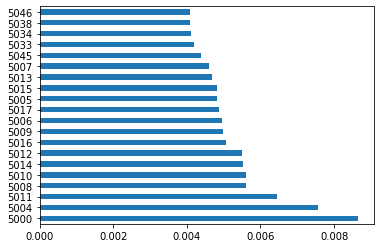

In [35]:
feat_importances = pd.Series(rf_opt_NS.feature_importances_)
feat_importances.nlargest(20).plot(kind='barh')

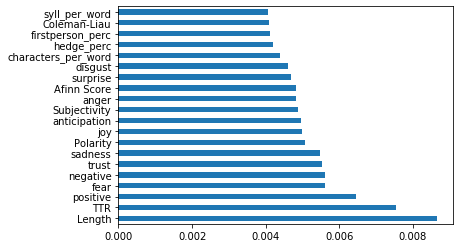

In [36]:
feat_importances2 = pd.Series(importance[-71:], index=X_train_df1.drop(columns = ['Cleaned_Text', 'index']).columns)
feat_importances2.nlargest(20).plot(kind='barh')